## ESERCIZIO 4

La prima cosa da fare è l'import delle librerie necessarie per poter creare i modelli

In [1]:
# Libreria utilizzata in questo caso per istanziare un oggetto dataframe partendo da un csv di input
import pandas as pd
# Libreria che gestisce gli oggetti array
import numpy as np
# Libreria che serve per visualizzare i dati
import matplotlib.pyplot as plt
# Varie librerie utilizzate per modellare i dati e valutare i modelli
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Questa è una magic function che ci permette di visualizzare i plot senza dover chiamare il metodo show() 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


La funzione **read_csv** legge il csv in input e ritorna un Dataframe

In [2]:
df = pd.read_csv('Downloads/dataset_prediction.csv')

La funzione **head()**, analogamente a *R*, mostra le prime 5 righe del DataFrame (valore di default)

In [3]:
df.head()

,id,repaga,quote,good_q,bad_q,suff_q,request,follow_up,rev_approved,foto_profilo,linkedin,facebook,website,has_description
0,Ugly stork,ricompra_si,372,257,23,92,935,417,30,0,0,1,1,1
1,Vile bilby,ricompra_no,284,192,20,72,669,187,4,0,1,0,0,0
2,Fair sora,ricompra_no,236,104,27,105,626,102,11,1,1,1,1,1
3,Spicy llama,ricompra_si,56,32,6,18,141,43,2,1,0,0,1,0
4,Opal koi,ricompra_no,592,287,57,248,880,545,0,1,1,1,1,0


Vediamo un pò le variabili che compongono il dataset.
La variabile **id**, come possiamo notare in basso, non è una variabile univoca, e ai fini della modellazione potremmo anche escluderla.
La variabile dipendente **repaga** è binaria, in quanto può assumere soltanto due valori.
Le variabili indipendenti **quote**, **good_q**, **bad_q**, **suff_q**, **request**, **follow_up** e **rev_approved** sono variabili numeriche.
Le variabili indipendenti **foto_profilo**, **linkedin**, **facebook**, **website** e **has_description** sono variabili cosìdette *dummy*. Di fatto sono variabili binarie in quanto possono assumere soltanto 2 valori.

In [4]:
# La variabile id non è univoca
df.id.value_counts().head()

Curdy cavy     3
Pine nymph     3
Unfit upupa    3
Taboo urva     2
Robo bream     2
Name: id, dtype: int64

La funzione describe ci permette di vedere le statistiche principali delle variabili numeriche. 
L'interprete di Python riconosce che c'è una variabile non numerica (id) e la esclude in automatico.
Questa funzione ci permette di vedere possibili anomalie nel dataset. 
Se infatti guardiamo i minimi delle variabili **quote**, **bad_q** e **suff_q** ci accorgiamo che sono numeri negativi. Ritengo che non abbia senso considerare valori inferiori a *0* per quelle variabili, e in generale per tutto il dataset. 

In [5]:
df.describe()

,quote,good_q,bad_q,suff_q,request,follow_up,rev_approved,foto_profilo,linkedin,facebook,website,has_description
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,43.109900,24.498800,5.079800,13.445900,120.541900,28.669300,1.864600,0.473200,0.488600,0.483900,0.4794,0.481100
std,170.833703,109.343098,14.233197,56.893119,327.218464,127.269488,4.200813,0.499306,0.499895,0.499766,0.4996,0.499668
min,-1.000000,0.000000,-10.000000,-41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000
75%,9.000000,2.000000,4.000000,3.000000,84.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.0000,1.000000
max,2846.000000,2169.000000,308.000000,1211.000000,5905.000000,2526.000000,63.000000,1.000000,1.000000,1.000000,1.0000,1.000000


La funzione **info()** ci permette di vedere il tipo degli oggetti Series, che rappresentano le colonne

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
id                 10000 non-null object
repaga             10000 non-null object
quote              10000 non-null int64
good_q             10000 non-null int64
bad_q              10000 non-null int64
suff_q             10000 non-null int64
request            10000 non-null int64
follow_up          10000 non-null int64
rev_approved       10000 non-null int64
foto_profilo       10000 non-null int64
linkedin           10000 non-null int64
facebook           10000 non-null int64
website            10000 non-null int64
has_description    10000 non-null int64
dtypes: int64(12), object(2)
memory usage: 1.1+ MB


Verifichiamo che non ci siano valori null

In [7]:
df[df.isnull()].count()

id                 0
repaga             0
quote              0
good_q             0
bad_q              0
suff_q             0
request            0
follow_up          0
rev_approved       0
foto_profilo       0
linkedin           0
facebook           0
website            0
has_description    0
dtype: int64

Portiamo a 0 tutti i valori numerici che sono minori di 0, in quanto, come ho detto prima, non ha tanto senso avere dei numeri negativi in questo dataset.
Prima di tutto mi estraggo i valori numerici dal dataframe con la funzione **_get_numeric_data()**, poi con una selezione condizionale assegno tutti i valori negativi a 0 e infine verifico che nel df non ci siano più valori negativi.

In [8]:
num = df._get_numeric_data()
num[num < 0] = 0
print(num.loc[:,['quote', 'bad_q', 'suff_q']][num < 0].count())
df.describe()

quote     0
bad_q     0
suff_q    0
dtype: int64


,quote,good_q,bad_q,suff_q,request,follow_up,rev_approved,foto_profilo,linkedin,facebook,website,has_description
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,43.110100,24.498800,5.081200,13.452500,120.541900,28.669300,1.864600,0.473200,0.488600,0.483900,0.4794,0.481100
std,170.833652,109.343098,14.232311,56.889862,327.218464,127.269488,4.200813,0.499306,0.499895,0.499766,0.4996,0.499668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000
75%,9.000000,2.000000,4.000000,3.000000,84.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.0000,1.000000
max,2846.000000,2169.000000,308.000000,1211.000000,5905.000000,2526.000000,63.000000,1.000000,1.000000,1.000000,1.0000,1.000000


A questo punto mi focalizzerei sulla variabile dipendente. 
Nel mondo reale capita spesso di trovarci di fronte a uno sbilanciamento dei valori all'interno della variabile binaria. Questo dataset non fa eccezioni. Come possiamo vedere il 10% della popolazione ricompra un pacchetto, mentre il 90% non lo fa. In casi come questi bisogna fare attenzione, in quanto l'accuracy può essere fuorviante. In fase di modellazione vedremo come indirizzare questo problema.

In [9]:
num_si = df.repaga[df.repaga == 'ricompra_si'].count()
num_no = df.repaga[df.repaga == 'ricompra_no'].count()
print(num_si)
print(num_no)
str(round(num_si / (num_no + num_si), 1)) + '%'

1014
8986


'0.1%'

Adesso vorrei visuallizare la distribuzione delle variabili numeriche (comprese quelle dummy)

Prima quelle numeriche. Vediamo che per tutte la distribuzione è **'positive skewed'** in quanto tutti i valori si concentrano sulla sinistra della distribuzione. 
Questo può essere interpretabile facendo riferimento al principio di Pareto, nel senso che il 20% della popolazione di riferimento è 'responsabile' per l'80% delle attività

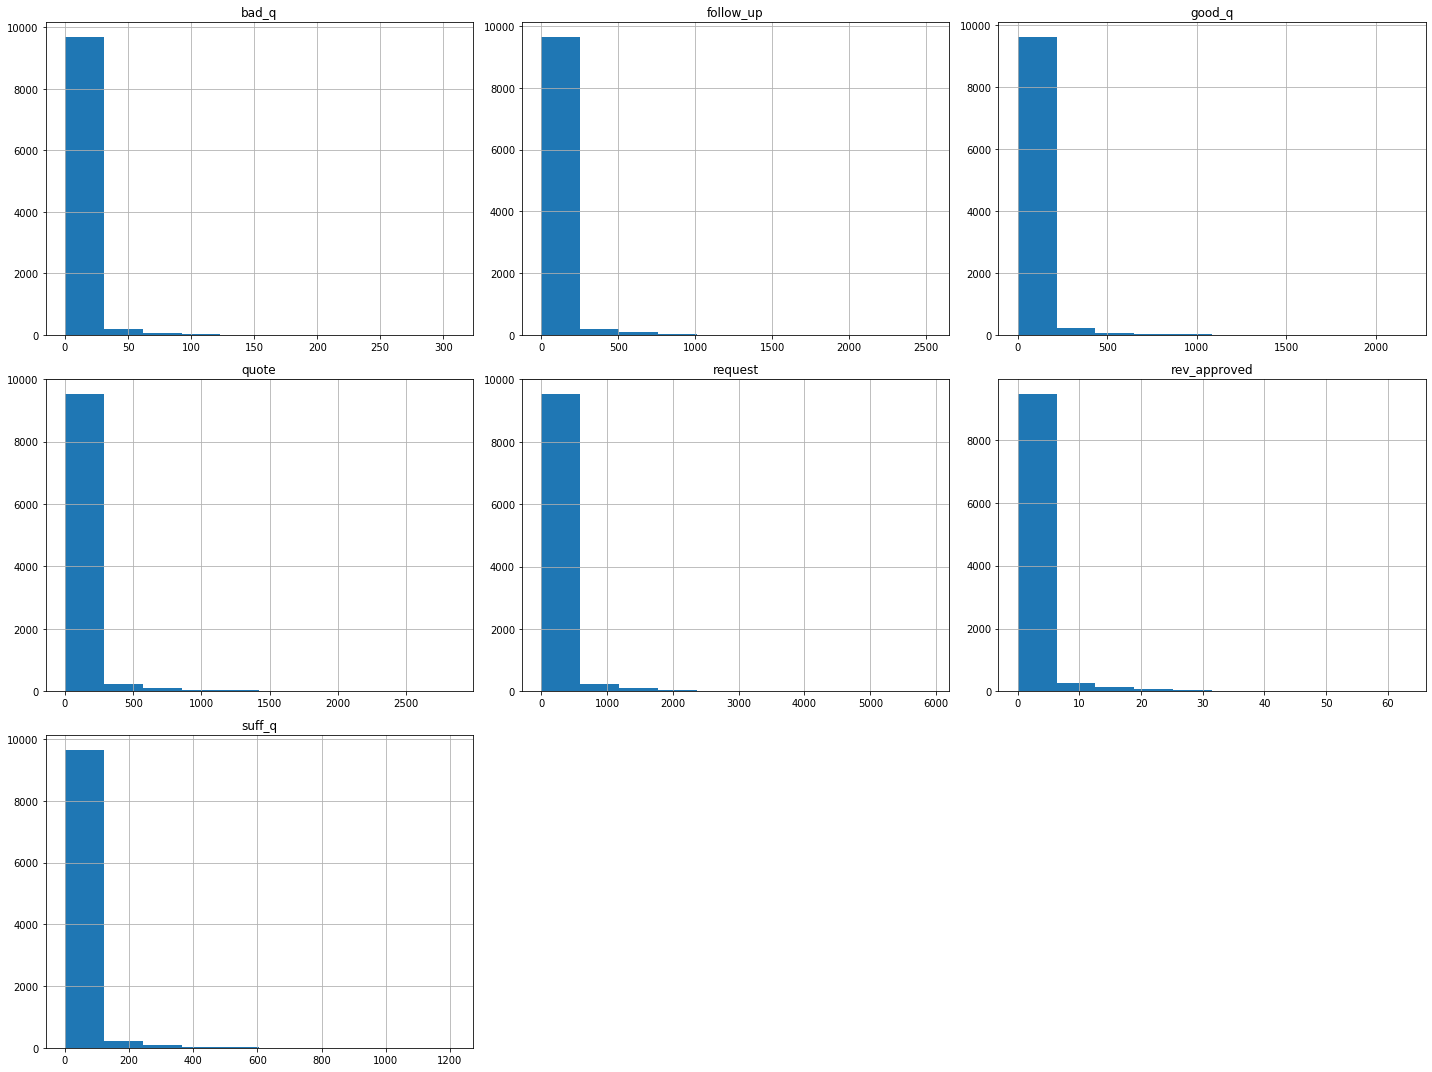

In [10]:
df.iloc[:,2:9].hist(figsize = (20,15))
plt.style.use('ggplot')
plt.tight_layout()

Vediamo invece che la distribuzione è abbastanza omogenea per le variabili dummy.

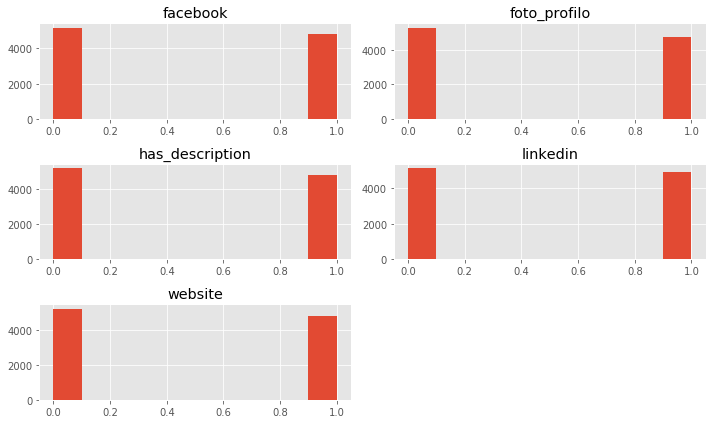

In [11]:
df.iloc[:,9:].hist(figsize = (10,6))
plt.style.use('ggplot')
plt.tight_layout()

Dal mio punto di vista è interessante anche vedere la distribuzione delle variabili numeriche considerando la variabile dipendente repaga, Prima di tutto prendo solo le variabili che mi interessano (quella dipendente più quelle numeriche indipendenti) e dopodichè uso la libreria matplotlib per ottenere dei boxplot

In [12]:
h = df.loc[:,['repaga','request', 'quote', 'good_q', 'bad_q','suff_q', 'follow_up', 'rev_approved']]

In [13]:
h.head()

,repaga,request,quote,good_q,bad_q,suff_q,follow_up,rev_approved
0,ricompra_si,935,372,257,23,92,417,30
1,ricompra_no,669,284,192,20,72,187,4
2,ricompra_no,626,236,104,27,105,102,11
3,ricompra_si,141,56,32,6,18,43,2
4,ricompra_no,880,592,287,57,248,545,0


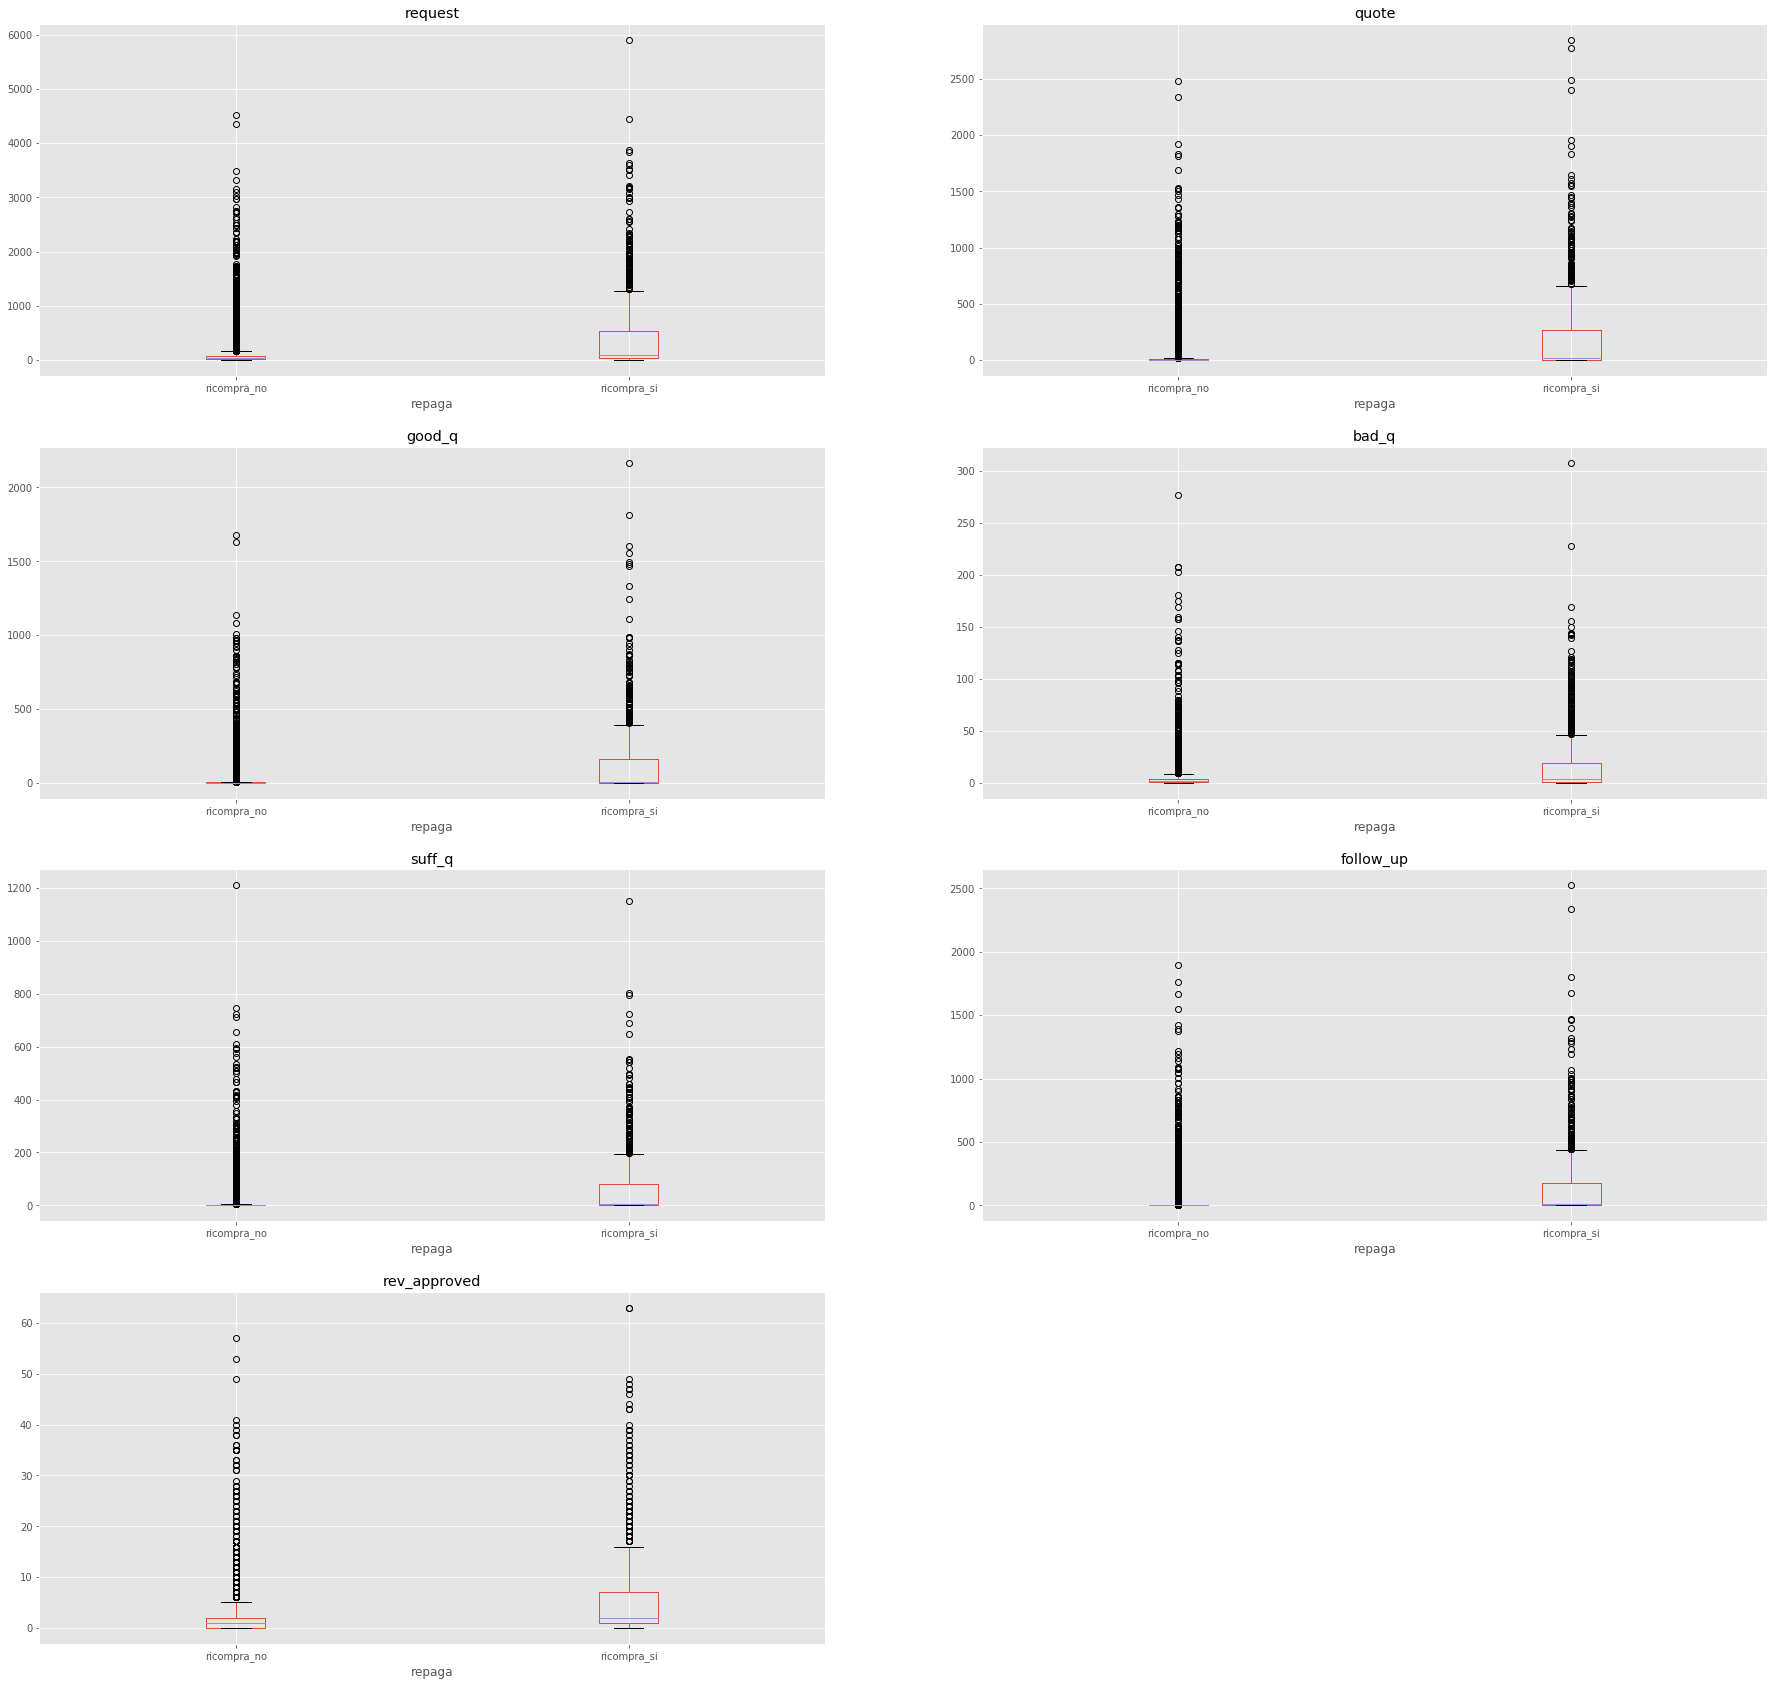

In [14]:
fig, ax = plt.subplots(4,2, figsize = (30,30)) # inizializzo 8 canvas vuoti (4x2) con la funzione **subplots** con taglia 30*30.
for i, col in enumerate(list(h.columns.values)[1:]): # itero sulla lista di colonne (escludendo la colonna repaga) associate a un indice
                       h.boxplot(col, by = 'repaga', ax = ax.flatten()[i]) #costruisco per ogni colonna un boxplot (raggruppando per la variabile repaga). il parametro ax serve per assegnare a ciascun canvas un numpy array monodimensionale 
plt.suptitle('') # per non mostrare il titolo che compare in automatico 
fig.delaxes(ax[3,1]) # remove the empty canvas

Da questi boxplot si può notare come ci sia più variabilità nella distribuzione dei valori **ricompra_si** per tutte le variabili considerate.
Questo può aver senso in quanto chi ricompra pacchetti riceve più richieste, revisioni approvate e recensioni, siano esse positive, negative o sufficienti, e, ovviamente, fa più preventivi e follow-up. Invece le distribuzioni delle variabili dei 'non fedeli' si concentrano su valori vicini allo zero (c'è minore variabilità).
Lo si può notare, oltre che graficamente, anche calcolando la media e la deviazione standard.

La funzione prende come input la colonna che vogliamo considerare, la statistica che vogliamo calcolare (media o devazione standard) e uno dei 2 valori della variabile *repaga* (**ricompra_si** o **ricompra_no**)

In [15]:
def statsRicompra(c,s,r):
    return int(round(s(c[df.repaga == r]))) 

In [16]:
print('Coloro che ricomprano un pacchetto hanno in media un numero di richieste pari a {0}.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.request,np.mean, 'ricompra_si'),statsRicompra(df.request,np.std,'ricompra_si')))

Coloro che ricomprano un pacchetto hanno in media un numero di richieste pari a 429.
La deviazione standard è pari a 685


In [17]:
print('Coloro che non ricomprano un pacchetto hanno in media un numero di richieste pari a {0}.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.request,np.mean, 'ricompra_no'),statsRicompra(df.request,np.std,'ricompra_no')))

Coloro che non ricomprano un pacchetto hanno in media un numero di richieste pari a 86.
La deviazione standard è pari a 233


In [18]:
print('Coloro che ricomprano un pacchetto fanno in media un numero di preventivi pari a {0}.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.quote,np.mean, 'ricompra_si'),statsRicompra(df.quote,np.std,'ricompra_si')))

Coloro che ricomprano un pacchetto fanno in media un numero di preventivi pari a 206.
La deviazione standard è pari a 356


In [19]:
print('Coloro che ricomprano un pacchetto fanno in media un numero di preventivi pari a {0}.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.quote,np.mean, 'ricompra_no'),statsRicompra(df.quote,np.std,'ricompra_no')))

Coloro che ricomprano un pacchetto fanno in media un numero di preventivi pari a 25.
La deviazione standard è pari a 122


In [20]:
print('Coloro che ricomprano un pacchetto ricevono in media {0} recensioni positive.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.good_q,np.mean, 'ricompra_si'),statsRicompra(df.good_q,np.std,'ricompra_si')))

Coloro che ricomprano un pacchetto ricevono in media 127 recensioni positive.
La deviazione standard è pari a 236


In [21]:
print('Coloro che non ricomprano un pacchetto ricevono in media hanno in media {0} recensioni positive.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.good_q,np.mean, 'ricompra_no'),statsRicompra(df.good_q,np.std,'ricompra_no')))

Coloro che non ricomprano un pacchetto ricevono in media hanno in media 13 recensioni positive.
La deviazione standard è pari a 76


In [22]:
print('Coloro che ricomprano un pacchetto ricevono in media {0} recensioni sufficienti.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.suff_q,np.mean, 'ricompra_si'),statsRicompra(df.suff_q,np.std,'ricompra_si')))

Coloro che ricomprano un pacchetto ricevono in media 63 recensioni sufficienti.
La deviazione standard è pari a 116


In [23]:
print('Coloro che non ricomprano un pacchetto ricevono in media hanno in media {0} recensioni sufficienti.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.suff_q,np.mean, 'ricompra_no'),statsRicompra(df.suff_q,np.std,'ricompra_no')))

Coloro che non ricomprano un pacchetto ricevono in media hanno in media 8 recensioni sufficienti.
La deviazione standard è pari a 42


In [24]:
print('Coloro che ricomprano un pacchetto ricevono in media {0} recensioni negative.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.bad_q,np.mean, 'ricompra_si'),statsRicompra(df.bad_q,np.std,'ricompra_si')))

Coloro che ricomprano un pacchetto ricevono in media 16 recensioni negative.
La deviazione standard è pari a 28


In [25]:
print('Coloro che non ricomprano un pacchetto ricevono in media hanno in media {0} recensioni negative.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.bad_q,np.mean, 'ricompra_no'),statsRicompra(df.bad_q,np.std,'ricompra_no')))

Coloro che non ricomprano un pacchetto ricevono in media hanno in media 4 recensioni negative.
La deviazione standard è pari a 11


In [26]:
print('Coloro che ricomprano un pacchetto fanno in media {0} follow-up.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.follow_up,np.mean, 'ricompra_si'),statsRicompra(df.follow_up,np.std,'ricompra_si')))

Coloro che ricomprano un pacchetto fanno in media 141 follow-up.
La deviazione standard è pari a 264


In [27]:
print('Coloro che non ricomprano un pacchetto fanno in media {0} follow_up.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.follow_up,np.mean, 'ricompra_no'),statsRicompra(df.follow_up,np.std,'ricompra_no')))

Coloro che non ricomprano un pacchetto fanno in media 16 follow_up.
La deviazione standard è pari a 93


In [28]:
print('Coloro che ricomprano un pacchetto ricevono in media {0} revisioni approvate.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.rev_approved,np.mean, 'ricompra_si'),statsRicompra(df.rev_approved,np.std,'ricompra_si')))

Coloro che ricomprano un pacchetto ricevono in media 6 revisioni approvate.
La deviazione standard è pari a 9


In [29]:
print('Coloro che non ricomprano un pacchetto ricevono in media {0} revisioni approvate.\nLa deviazione standard è pari a {1}'.format(statsRicompra(df.rev_approved,np.mean, 'ricompra_no'),statsRicompra(df.rev_approved,np.std,'ricompra_no')))

Coloro che non ricomprano un pacchetto ricevono in media 1 revisioni approvate.
La deviazione standard è pari a 3


Dopo una prima fase esplorativa, adesso possiamo iniziare con il preprocessing e la modellazione dei dati a disposizione.
Utilizzo tutte le variabili tranne quella id, che reputo non tanto utile ai fini della modellazione

In [30]:
df.drop('id', inplace=True, axis = 1)

Il primo algoritmo che voglio utilizzare è KNN. Un modello abbastanza semplice che si basa sulla vicinanza tra i data points per la loro classificazione. Uno step da compiere è il cosìdetto scaling. Basandosi sulla distanza euclidea, è necessario che tutte le variabili indipendenti vengano normalizzate in modo che possano giacere sullo stesso piano.

A tal fine creo una funzione che ci permette di fare questa operazione di scaling.

In [31]:
def scale(x):
    scaler = StandardScaler()
    scaler.fit(x)
    scaled_features = scaler.transform(x)
    scaledfeat = pd.DataFrame(scaled_features)
    scaledfeat.rename(columns ={0: 'quote', 1: 'good_q',2: 'bad_q', 3: 'suff_q', 4: 'request', 5: 'follow_up', 6: 'rev_approved', 7: 'foto_profilo', 8: 'linkedin', 9:'facebook',10:'website',11:'has_description'}, inplace = True)
    return scaledfeat

 **X** rappresenta la matrice delle variabili indipendenti mentre y è il vettore della variabile dipendente

In [32]:
X = scale(df.loc[:,'quote':])
y = df['repaga']

Come possiamo notare tutte le variabili adesso si trovano in un range normalizzato (con media = 0 e deviazione standard = 1)

In [33]:
X.head()

,quote,good_q,bad_q,suff_q,request,follow_up,rev_approved,foto_profilo,linkedin,facebook,website,has_description
0,1.925302,2.126452,1.259086,1.380763,2.489159,3.051400,6.697943,-0.947762,-0.977454,1.032736,1.042085,1.038542
1,1.410155,1.531963,1.048287,1.029189,1.676206,1.244121,0.508356,-0.947762,1.023066,-0.968302,-0.959615,-0.962888
2,1.129166,0.727117,1.540150,1.609286,1.544789,0.576213,2.174783,1.055117,1.023066,1.032736,1.042085,1.038542
3,0.075457,0.068606,0.064561,0.079939,0.062524,0.112607,0.032233,1.055117,-0.977454,-0.968302,1.042085,-0.962888
4,3.213169,2.400831,3.648135,4.123041,2.321067,4.057190,-0.443889,1.055117,1.023066,1.032736,1.042085,-0.962888


La funzione **train_test_split** ci permette di dividere il dataset in 2 parti. Una parte, il train (il 75% nel mio caso) ci permetterà di 'fittare' un modello. L'altra parte, il test (il restante 25%) ci permetterà appunto di testare il modello 'fittato'. Il parametro **random_state** indica che gli oggetti creati dalla funzione **train_test_split** saranno replicati n volte uguali. Si fa perchè i train e test set vengono generati in maniera randomica.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .25,random_state=100)

Con la seguente iterazione voglio crearmi una lista di numeri reali, ciascuno dei quali rappresenta l'error rate per ogni numero di neighbors da 1 a 30. In questo modo posso selezionare il numero di neighbors per il quale l'errore viene minimizzato.

In [35]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

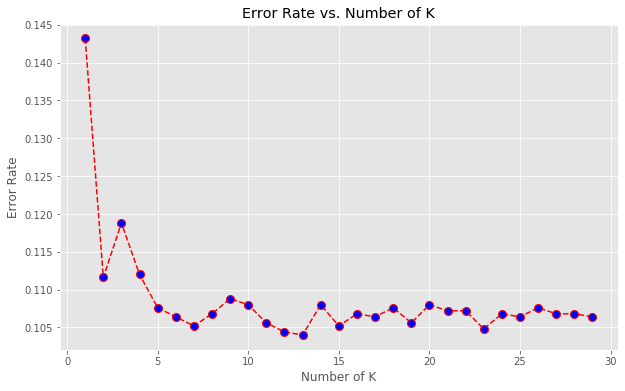

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate vs. Number of K')
plt.xlabel('Number of K')
plt.ylabel('Error Rate')

L'oggetto **KNeighborsClassifier** rappresenta il classificatore con il quale 'fitteremo' il modello. Ho settato il numero di neighbors basandomi sul grafico precedente. Per fortuna in questo caso il numero di neighbors che minimizza l'errore è facilmente individuabile a occhio (**13**)

In [37]:
knn = KNeighborsClassifier(n_neighbors=13)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

Ora che abbiamo fittato un modello utilizzando il train possiamo fare la nostra previsione sul test.

In [39]:
pred = knn.predict(X_test)

E subito dopo calcolare la performance

In [40]:
knn.score(X_test, y_test) 

0.896

A prima vista sembra un buon modello. In realtà non è detto che lo sia, in quanto, trattandosi di un dataset con due classi sbilanciate, è altamente probabile che il modello non sia in grado di prevedere la classe meno presente (nel nostro caso ricompra_si)

Infatti come possiamo constatare sia dalla **confusion_matrix** ma anche dal **classification_report**, sebbene la classe *ricompra_no* venga classificata molto bene, quella *ricompra_si* non viene classificata bene altrettanto.
Come possiamo vedere su 276 osservazioni che hanno il valore 'ricompra_si' solo 60 vengono classificate correttamente.

E' importante notare che, dal punto di vista del business, gli errori non hanno una valenza simmetrica, o per dirla meglio, non hanno lo stesso impatto. Molte volte è meglio implementare un modello con meno accuratezza ma che predice meglio la classe che interessa di più al nostro business. In questo caso la classe di riferimento è **recompra_si**. In conclusione possiamo dire che il modello 'overfitta' la classe **recompra_no** e considera come 'noise' la classe **recompra_si**. Dunque non possiamo sostenere che il modello sia buono. 

In [41]:
print(confusion_matrix(y_test,pred))
print('\n')
print('*****************************************************')
print('\n')
print(classification_report(y_test,pred))

[[2181   43]
 [ 217   59]]


*****************************************************


              precision    recall  f1-score   support

 ricompra_no       0.91      0.98      0.94      2224
 ricompra_si       0.58      0.21      0.31       276

    accuracy                           0.90      2500
   macro avg       0.74      0.60      0.63      2500
weighted avg       0.87      0.90      0.87      2500



Vediamo se, utilizzando la tecnica del cross validation, riusciamo ad ottenere una migliore prediction per la classe **recompra_si**

In [42]:
# lista inizializzata che conterrà i punteggi della cross validation
cv_scores = []

# questa è una 10-fold cross validation (cv= 10). L'iterazione la facciamo sino a 50
for k in list(range(1,50)):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Successivamente mi ricavo il Mean Squared Error per ogni valore di neighbors

In [43]:
MSE = [1 - x for x in cv_scores]

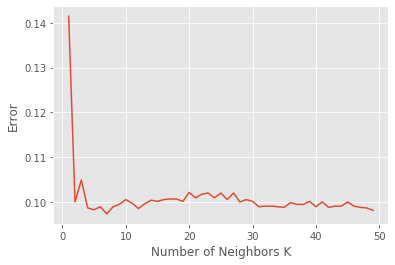

In [44]:
plt.plot(list(range(1,50)), MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error')
plt.show()

Il numero di neighbors che minimizza l'errore è 6, per uno score del 90%

In [45]:
MSE.index(min(MSE))

6

In [46]:
cv_scores_max = pd.DataFrame(cv_scores).max()
cv_scores_max

0    0.902666
dtype: float64

In [47]:
knn2 = KNeighborsClassifier(n_neighbors=6)

In [48]:
y_pred = cross_val_predict(knn2, X_test, y_test, cv=10)

In [49]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print('*****************************************************')
print('\n')
print(classification_report(y_test,y_pred))

[[2188   36]
 [ 236   40]]


*****************************************************


              precision    recall  f1-score   support

 ricompra_no       0.90      0.98      0.94      2224
 ricompra_si       0.53      0.14      0.23       276

    accuracy                           0.89      2500
   macro avg       0.71      0.56      0.58      2500
weighted avg       0.86      0.89      0.86      2500



Per nostra sfortuna, il modello overfitta sempre di più.

Direi che è il caso di provare a utilizzare dei modelli più complessi. Provo a iniziare dal DecisionTree, un modello non lineare che ci permette di costruire uno schema ad albero che si basa su delle decisioni. Il parametro **class_weight = balanced** ci permette di trattare ogni categoria come egualmente importante  

In [50]:
dtree = DecisionTreeClassifier(class_weight='balanced')

In [51]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
predictions = dtree.predict(X_test)

In [53]:
dtree.score(X_test, y_test)

0.8456

In [54]:
print(confusion_matrix(y_test,predictions))
print('\n')
print('*****************************************************')
print('\n')
print(classification_report(y_test,predictions))

[[2029  195]
 [ 191   85]]


*****************************************************


              precision    recall  f1-score   support

 ricompra_no       0.91      0.91      0.91      2224
 ricompra_si       0.30      0.31      0.31       276

    accuracy                           0.85      2500
   macro avg       0.61      0.61      0.61      2500
weighted avg       0.85      0.85      0.85      2500



Il modello ci apporta qualche miglioramento rispetto al KNN in termini di previsione della variabile **ricompra_si**, però non sostanziale.

Proviamo con il random forest, una modello che fa parte della categoria delgi ensemble. Sicuramente  è più complesso rispetto ai due precedenti dal punto di vista dell'interpretazione ma allo stesso tempo è in grado di gestire meglio il problema delle imbalanced classes per via del resampling, una tecnica che serve per limitare l'overfitting. 
Imposto 100 come numero di classificatori che vengono utilizzati dall'algoritmo.

In [55]:
rfc = RandomForestClassifier(150)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
predictionsrf = rfc.predict(X_test)

In [58]:
rfc.score(X_test, y_test)

0.89

In [59]:
print(confusion_matrix(y_test,predictionsrf))
print('\n')
print('*****************************************************')
print('\n')
print(classification_report(y_test,predictionsrf))

[[2144   80]
 [ 195   81]]


*****************************************************


              precision    recall  f1-score   support

 ricompra_no       0.92      0.96      0.94      2224
 ricompra_si       0.50      0.29      0.37       276

    accuracy                           0.89      2500
   macro avg       0.71      0.63      0.66      2500
weighted avg       0.87      0.89      0.88      2500



Non è proprio il risultato che ci aspettavamo. Il recall (che risponde alla domanda: per tutti i professionisti che avevano effettivamente ricomprato un pacchetto, quale percentuale è stata classificata correttamente?) per i valori **ricompra_si** è addirittura peggiorato.

Una tecnica aggiuntiva e molto utile è rappresentata dalla così detta feature selection. Ci permette di capire se tra le variabili indipendenti, ci sono quelle che sono 'noisy' e ci danno poco in termini di previsione.


Utilizzo la classe RFE (recursive feature elimination) per assegnare i pesi alle features in modo da ricavare la classifica di quelle più importanti. Proviamo con 6 (la metà)

In [60]:
rfe = RFE(rfc, 6)
rfe = rfe.fit(X,y) 

In [61]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True  True False False False False False]
[1 1 2 1 1 1 1 7 6 4 3 5]


Piccolo reminder per inquadrare l'ordine delle features

In [62]:
X.columns

Index(['quote', 'good_q', 'bad_q', 'suff_q', 'request', 'follow_up',
       'rev_approved', 'foto_profilo', 'linkedin', 'facebook', 'website',
       'has_description'],
      dtype='object')

Le 6 più importanti features sono 'quote', 'good_q', 'suff_q', 'request', 'follow up' e 'res_approved'

Per esserne ancora più sicuri, faccio un double check utilizzando la proprietà **feature_importance**.
Possiamo notare come il numero di richieste sia quella più importante. Ha senso dal punto di vista del business, in quanto è la variabile che determina più di ogni altra il riacquisto di pacchetti. 

**La domanda (richieste) stimola l'offerta.** 

In [63]:
rfc.fit(X,y)
print(rfc.feature_importances_)

[0.11111483 0.12071264 0.06866128 0.09027526 0.25398499 0.11905196
 0.09577828 0.02560982 0.02746825 0.02872358 0.02933654 0.02928258]


Abbiamo avuto conferma che le 6 features più importanti sono quelle che abbiamo ottenuto in precedenza

Creiamo una nuova matrice di features basandoci sui risultati appena ottenuti.

In [64]:
X2 = df.loc[:,['quote', 'good_q', 'suff_q', 'request', 'follow_up',
       'rev_approved']]

Utilizzo il nuovo df delle features come input per generare nuovamente il train.

In [65]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = .25,random_state=100)

Fitto un modello basandomi utilizzando l'oggetto creato in precedenza (quello che cambia è il train)

In [66]:
rfc.fit(X2_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
predictionsrfc = rfc.predict(X2_test)

In [68]:
print(confusion_matrix(y_test,predictionsrfc))
print('\n')
print('*****************************************************')
print('\n')
print(classification_report(y_test,predictionsrfc))

[[2147   77]
 [ 189   87]]


*****************************************************


              precision    recall  f1-score   support

 ricompra_no       0.92      0.97      0.94      2224
 ricompra_si       0.53      0.32      0.40       276

    accuracy                           0.89      2500
   macro avg       0.72      0.64      0.67      2500
weighted avg       0.88      0.89      0.88      2500



In [69]:
rfc.score(X2_test, y_test)

0.8936

## CONCLUSIONI

I modelli che ho implementato hanno tutto sommato una buona accuratezza, ma non riescono a catturare efficacemente la previsione del valore **recompra_si**, il quale, non a caso, è il *KPI* che si vuole massimizzare.
Tra i modelli utilizzati senza dubbio il random forest con 6 variabili indipendenti è il migliore, non solo in termini assoluti, ma soprattutto perchè riesce a prevedere meglio i casi di **recompra_si**.
Dal punto di vista del business è importante capire che gli errori di previsione non hanno lo stesso peso. 
In questo caso possiamo dire:
- se il nostro modello ci dice che il professionista ricomprerà ma in realtà non ricompra (FALSI NEGATIVI), ci troviamo nella casistica peggiore, per due ragioni:
    1. Dobbiamo sostenere i costi per l'acquisizione di un nuovo cliente per recuperare quello che pensavamo di avere nel nostro portafoglio (sappiamo che attrarre nuovi clienti costa molto di più rispetto a fidelizzare quelli già esistenti).
    2. Bisogna anche considerare di conseguenza il profitto perso;
- se invece il nostro modello ci dice che il professionista non ricomprerà ma in realtà ricompra (FALSI POSITIVI), le nostre attività di marketing saranno inutili. Erroneamente potremmo indirizzare un messaggio che possa indurre il professionista alla fidelizzazione quando in realtà è gia fidelizzato.

Tra i due errori, secondo me il primo è più rilevante e ha un peso più grande.

Ripercorriamo un pò i modelli utilizzati:

- Il KNN tra i modelli ha un'accuratezza più bassa, è il migliore per quanto riguarda i FALSI POSITIVI (li minimizza)
- Con il DecisionTree miglioriamo l'accuratezza, peggiora la previsione dei FALSI POSITIVI e migliora quella dei FALSI NEGATIVI
- Infine con la Random Forest abbiamo un miglioramento in termini di accuratezza ma soprattutto in termini di minimizzazione dei FALSI NEGATIVI, che è veramente quello che interessa al business.

Essere in grado di focalizzare gli sforzi su questo punto e fare fine-tuning ricercando il miglior modello in termine di minimizzazione dei FALSI NEGATIVI può apportare dei vantaggi tangibili al business.  
Un altro spunto interessante è rappresentato dalle variabili più importanti. Grazie alla libreria **feature_selection** di *Python* sono riuscito a estrapolare le *6* variabili che influiscono di più la variabile di risposta. Possiamo dire che le dummy variables sono le meno importanti e il numero di richieste gioca un ruolo fondalmentale.
Piccolo appunto: avrei potuto utilizzare le variabili non normalizzate per i modelli tree based (decision tree e random forest) però ho ritenuto più opportuno usare una matrice con valori normalizzati, come fatto per il modello KNN

## Grazie per l'attenzione

### Luca RIZZI